**CNN model that uses images to check if the person is happy or not:------------------------------------------------------------------------------------**

Training set: 600 Training images and 150 Test images of size (64,64,3)

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [ ]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """

    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [ ]:
happyModel = HappyModel(X_train.shape[1:])

In [ ]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)

Epoch 1/40
600/600 [==============================] - 12s - loss: 1.5360 - acc: 0.5900    
Epoch 2/40
600/600 [==============================] - 13s - loss: 0.4340 - acc: 0.8083    
Epoch 3/40
600/600 [==============================] - 12s - loss: 0.1771 - acc: 0.9250    
Epoch 4/40
600/600 [==============================] - 14s - loss: 0.1184 - acc: 0.9600    
Epoch 5/40
600/600 [==============================] - 14s - loss: 0.1027 - acc: 0.9617    
Epoch 6/40
600/600 [==============================] - 15s - loss: 0.0936 - acc: 0.9667    
Epoch 7/40
600/600 [==============================] - 15s - loss: 0.0744 - acc: 0.9783    
Epoch 8/40
600/600 [==============================] - 16s - loss: 0.0641 - acc: 0.9867    
Epoch 9/40
600/600 [==============================] - 14s - loss: 0.0753 - acc: 0.9733    
Epoch 10/40
600/600 [==============================] - 14s - loss: 0.0612 - acc: 0.9800    
Epoch 11/40
600/600 [==============================] - 15s - loss: 0.0519 - acc: 0.9833  

In [ ]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 2s     

Loss = 0.200629468759
Test Accuracy = 0.92666667064


In [ ]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

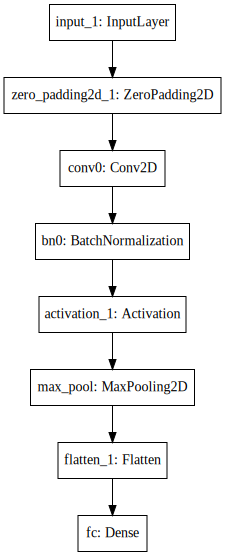

In [ ]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))